In [3]:
import numpy as np

x = np.array([55, 71, 68, 87, 101, 87, 75, 78, 93, 73])
y = np.array([91, 101, 87, 109, 129, 98, 95, 101, 104, 93])

In [4]:
def ols_algebra(x, y):
    """
    参数:
    x -- 自变量数组
    y -- 因变量数组

    返回:
    w1 -- 线性方程系数
    w0 -- 线性方程截距项
    """
    n = len(x)
    w1 = (n * sum(x * y) - sum(x) * sum(y)) / (n * sum(x * x) - sum(x) * sum(x))
    w0 = (sum(x * x) * sum(y) - sum(x) * sum(x * y)) / (
        n * sum(x * x) - sum(x) * sum(x)
    )

    return w1, w0

In [5]:
w1, w0 = ols_algebra(x, y)
round(w1, 3), round(w0, 3)

(0.718, 44.256)

In [7]:
#### 利用梯度下降进行计算


def ols_gradient_descent(x, y, lr, num_iter):
    """
    参数:
    x -- 自变量数组
    y -- 因变量数组
    lr -- 学习率
    num_iter -- 迭代次数

    返回:
    w1 -- 线性方程系数
    w0 -- 线性方程截距项
    """

    w1 = 0
    w0 = 0
    for i in range(num_iter):
        temp = y - (w0 + w1 * x)
        w1 -= lr * -2 * sum(x * temp)
        w0 -= lr * -2 * sum(temp)

    return w1, w0


w1_, w0_ = ols_gradient_descent(x, y, lr=0.00001, num_iter=100)
round(w1_, 3), round(w0_, 3)

(1.264, 0.038)

Text(0.5, 1.0, 'Gradient descent')

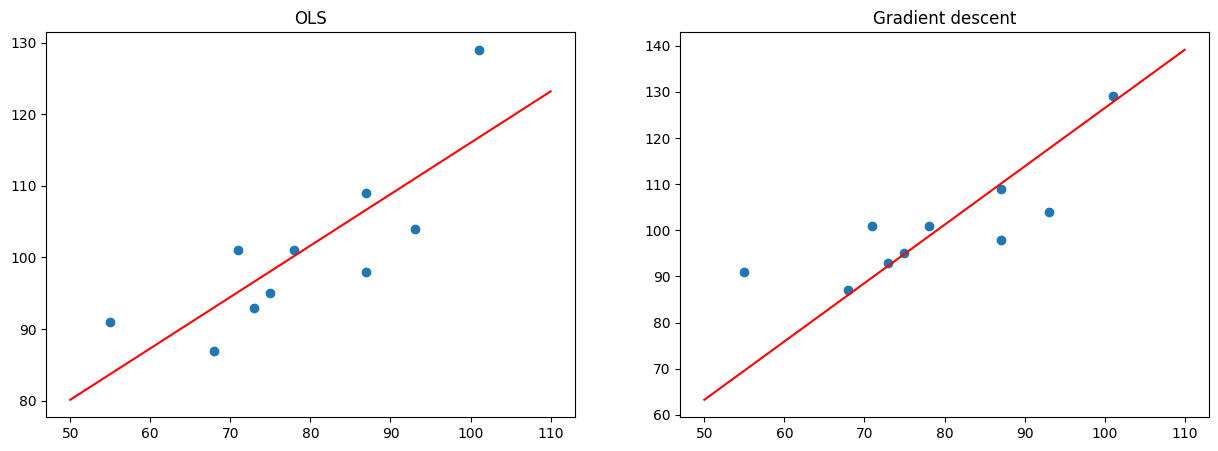

In [8]:
from matplotlib import pyplot as plt

%matplotlib inline

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].scatter(x, y)
axes[0].plot(np.array([50, 110]), np.array([50, 110]) * w1 + w0, "r")
axes[0].set_title("OLS")
axes[1].scatter(x, y)
axes[1].plot(np.array([50, 110]), np.array([50, 110]) * w1_ + w0_, "r")
axes[1].set_title("Gradient descent")

In [ ]:
# 线性回归方法之所以使用普通最小二乘法来求解，是因为我们可以很方便地求出损失函数的最小值。但是，机器学习中的很多问题，往往会面对非常复杂的损失函数，这些损失函数一般无法直接求得最小值，只能使用迭代方法来求取局部或全局极小值